# KNN Classification</font>

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.model_selection
import sklearn.decomposition
import sklearn.model_selection
import sklearn.neighbors
import sklearn.metrics

In [2]:
# generating dataset
digits = sklearn.datasets.load_digits()

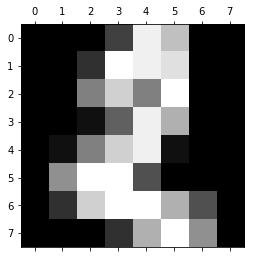

In [3]:
# Ploting one
plt.gray() 
plt.matshow(digits.images[2]) 
plt.show() 

In [4]:
# Creating X e Y
X = digits.data
Y = digits.target

In [5]:
# Shape of each one
print(X.shape, Y.shape)

(1797, 64) (1797,)


In [6]:
# Spliting in train and test set
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split (X, Y, 
                                                                                  test_size = 0.33, 
                                                                                  random_state = 101)

In [9]:
# Normalizing using mean

X_mean = np.mean(X_train, axis = 0)

X_train_norm = X_train - X_mean
X_test_norm = X_test - X_mean

In [11]:
# Shape dos datasets
print(X_train_norm.shape, X_test_norm.shape, Y_train.shape, Y_test.shape)

(1203, 64) (594, 64) (1203,) (594,)


In [12]:
# Single Value Decompositon (SVD) - Reducing dimensions

svd = sklearn.decomposition.TruncatedSVD(n_components = 2)
X_2d = svd.fit_transform(X_train_norm)

In [48]:
# Function to test the best K value
def compute_test(x_test, y_test, clf, cv):
    KFolds = sklearn.model_selection.KFold(n_splits = cv)
    
    scores = []
    
    for i, j in KFolds.split(x_test):
        test_set = x_test[j]
        test_labels = y_test[j]
        scores.append(sklearn.metrics.accuracy_score(test_labels, clf.predict(test_set)))
    return scores

In [14]:
# Defining parameters, we will test K = 1 to 20
k = np.arange(20) + 1
parameters = {'n_neighbors':k}

In [15]:
# Constructing KNN model
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
model = sklearn.neighbors.KNeighborsClassifier()

In [22]:
# Grid Search for Cross Validation with the best K value
modelKNN = sklearn.model_selection.GridSearchCV(model, parameters, cv = 10)

In [23]:
modelKNN.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)>

In [24]:
# Empty lists que will receive accuracy scores e parameters
accuracy = []
params = []

In [25]:
# Dimension list, we will test from 1 dimension to 10
dimensions = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [52]:
# Implementing the model
for d in dimensions:
    svd = sklearn.decomposition.TruncatedSVD(n_components = d)
    
    if d < 64:
        X_fit_train = svd.fit_transform(X_train)
        X_fit_test = svd.transform(X_test)
    else:
        X_nl = X_train
        X_nl1 = X_test
        
    modelKNN.fit(X_fit_train, Y_train)
    
    accuracy.append(compute_test(x_test = X_fit_test, y_test = Y_test, clf = modelKNN, cv = 10))
    params.append(modelKNN.best_params_['n_neighbors'])

In [54]:
# Accuracy grows as we increase the number of dimensions
print(accuracy)
print(params)

[[0.18333333333333332, 0.083333333333333329, 0.16666666666666666, 0.13333333333333333, 0.1864406779661017, 0.10169491525423729, 0.13559322033898305, 0.10169491525423729, 0.067796610169491525, 0.15254237288135594], [0.48333333333333334, 0.40000000000000002, 0.41666666666666669, 0.31666666666666665, 0.38983050847457629, 0.40677966101694918, 0.4576271186440678, 0.5423728813559322, 0.30508474576271188, 0.38983050847457629], [0.68333333333333335, 0.68333333333333335, 0.6333333333333333, 0.66666666666666663, 0.61016949152542377, 0.57627118644067798, 0.74576271186440679, 0.67796610169491522, 0.61016949152542377, 0.64406779661016944], [0.81666666666666665, 0.81666666666666665, 0.75, 0.76666666666666672, 0.76271186440677963, 0.72881355932203384, 0.86440677966101698, 0.84745762711864403, 0.69491525423728817, 0.81355932203389836], [0.91666666666666663, 0.84999999999999998, 0.83333333333333337, 0.84999999999999998, 0.83050847457627119, 0.81355932203389836, 0.9152542372881356, 0.86440677966101698, 

## Changing parameters

In [57]:
# Changing model's parameters, let's try hamming...
model_v2 = sklearn.neighbors.KNeighborsClassifier(metric = 'hamming')

# Grid Search for Cross Validation with the best K value
modelKNN_V2 = sklearn.model_selection.GridSearchCV(model_v2, parameters, cv = 10)

In [59]:
modelKNN_V2.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='hamming',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)>

In [42]:
# Empty lists
accuracy2 = []
params2 = []

# Dimension list
dimensions = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [65]:
# Implementing models
for d in dimensions:
    svd = sklearn.decomposition.TruncatedSVD(n_components = d)
    
    if d < 64:
        X_fit_train = svd.fit_transform(X_train)
        X_fit_test = svd.transform(X_test)
    else:
        X_nl = X_train
        X_nl1 = X_test
        
    modelKNN_V2.fit(X_fit_train, Y_train)
    
    accuracy2.append(compute_test(x_test = X_fit_test, y_test = Y_test, clf = modelKNN_V2, cv = 10))
    params2.append(modelKNN_V2.best_params_['n_neighbors'])

In [64]:
accuracy2

[[0.18333333333333332,
  0.083333333333333329,
  0.13333333333333333,
  0.13333333333333333,
  0.050847457627118647,
  0.084745762711864403,
  0.067796610169491525,
  0.10169491525423729,
  0.084745762711864403,
  0.067796610169491525],
 [0.083333333333333329,
  0.050000000000000003,
  0.13333333333333333,
  0.13333333333333333,
  0.10169491525423729,
  0.050847457627118647,
  0.067796610169491525,
  0.10169491525423729,
  0.067796610169491525,
  0.10169491525423729],
 [0.083333333333333329,
  0.050000000000000003,
  0.11666666666666667,
  0.083333333333333329,
  0.084745762711864403,
  0.10169491525423729,
  0.11864406779661017,
  0.13559322033898305,
  0.13559322033898305,
  0.067796610169491525],
 [0.18333333333333332,
  0.083333333333333329,
  0.13333333333333333,
  0.13333333333333333,
  0.050847457627118647,
  0.084745762711864403,
  0.067796610169491525,
  0.10169491525423729,
  0.084745762711864403,
  0.067796610169491525],
 [0.083333333333333329,
  0.050000000000000003,
  0.11

### The model is much worst now!!! minkowski is better in this case

In [77]:
svd = sklearn.decomposition.TruncatedSVD(n_components = 10)
X_fit_train = svd.fit_transform(X_train)
X_fit_test = svd.transform(X_test)
finalmodel = sklearn.neighbors.KNeighborsClassifier(n_neighbors=1)
finalmodel.fit(X_fit_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [78]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=7)
results = model_selection.cross_val_score(finalmodel, X_fit_test, Y_test, cv=kfold, scoring='accuracy')
print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))

Accuracy: 0.978 (0.018)


### 97,8% !!! It's great!